# Guidance for the regression on the manifold data

This file provide a step-to-step guidance to apply SGDL model to manifold data (section 3.2 in the papar).

## Data descriptions
We create a seperate file 'ManifoldsData.py' to generate data.  Readers can dive in this file to see how the data are generated.


## Training and testing models 
We create the seperate 'main_run.py' for training models. In this file, there are several parameters need to be setted.

+ Amptype: choose from 'increase', 'vary'. In this example, we've explored two settings: 'increase' for setting 1, and 'vary' for setting 2.

+ L:  choose from 4, 0. This is the parameter 'q' in equation (9).

+ SGD :  choose from 'True' or 'False'. If employing the stochastic method within Adam, set SGD to 'True' and define the minibatch size. Conversely, if utilizing the full gradient in Adam, set SGD to 'False' and minibatch size to 'False'.

+ mini_batch : choose from '512', '1024', 'Full'. Set the minibatch size.

+ layers_dims: [1, 256, 256, 256, 256, 256, 256, 256, 256, 1]. This is the structure of SGDL model.

+ epochs: 30000. The total of training epochs in SGDL.  

+ MIN_learning_rate: choose from '1e-7, 1e-6, 1e-5, 1e-4'. The minimum learning rate, denote as $t_{min}$ in the paper.

+ MAX_learning_rate: choose from '5e-5, 1e-5, 1e-4, 5e-4, 1e-3'. The maximum learning rate, denote as $t_{max}$ in the paper.

Once the above parameters setted, we can train our model by run the file 'main_run.py'.

##### Training SGDL model by readers
If readers prefer to train the model themselves, they can utilize the following code and the results will be save in the folder 'results'

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%run main_run.py

Reader can analysis and test their own model as follows.

results/Ampincrease_xavier_single_epochs300_MAXlearningrate1.00e-03_MINlearningrate1.00e-04_validation1.0000e+00_train1.0000e+00_minibatchzie512_L0.pickle
###########################################################################
results/Ampincrease_xavier_single_epochs300_MAXlearningrate1.00e-03_MINlearningrate1.00e-04_validation1.0000e+00_train1.0000e+00_minibatchzie512_L0.pickle
{'layers_dims': [2, 256, 256, 256, 256, 256, 256, 256, 256, 1], 'lambd_W': 0, 'sinORrelu': 0, 'activation': 'relu', 'init_method': 'xavier'}
{'optimizer': 'adam', 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08, 'error': 1e-07, 'max_learning_rate': 0.001, 'min_learning_rate': 0.0001, 'epochs': 300, 'REC_FRQ': 100, 'SGD': True, 'mini_batch_size': 512}
train_rse is 1.0000000000877853, validation_rses is 0.9999997467320277
the train time is 402.31373596191406


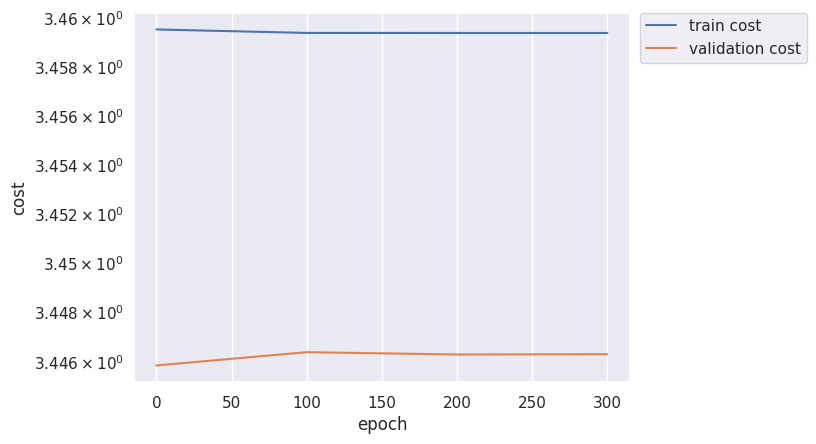

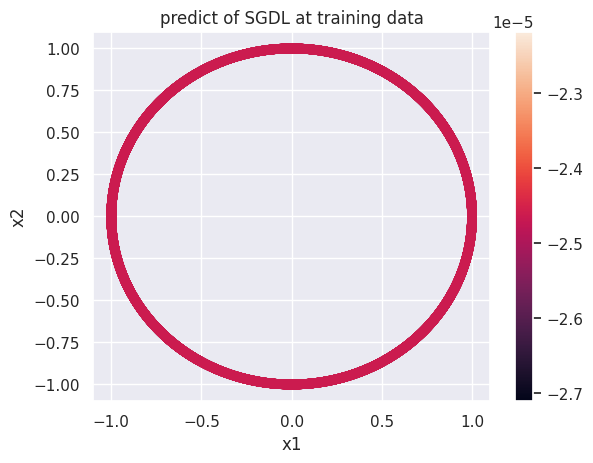

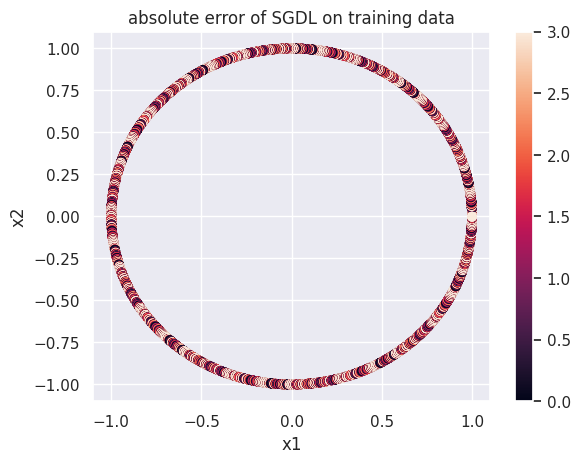

In [15]:
import glob
from analysis import results_analysis
path = 'results/*.pickle'.format(Amptype)
for file in glob.glob(path):
    print(file)
    results_analysis(file)  #if figure is True, the loss and training process will display, otherwise only display loss
    
 

results/Ampincrease_xavier_single_epochs300_MAXlearningrate1.00e-03_MINlearningrate1.00e-04_validation1.0000e+00_train1.0000e+00_minibatchzie512_L0.pickle
the test rse for each grade is 0.999999147291122


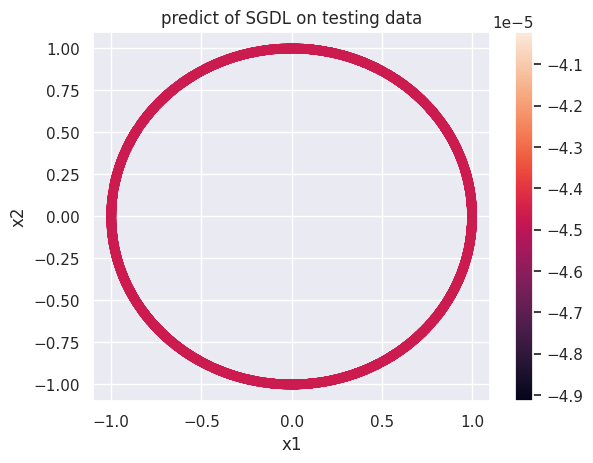

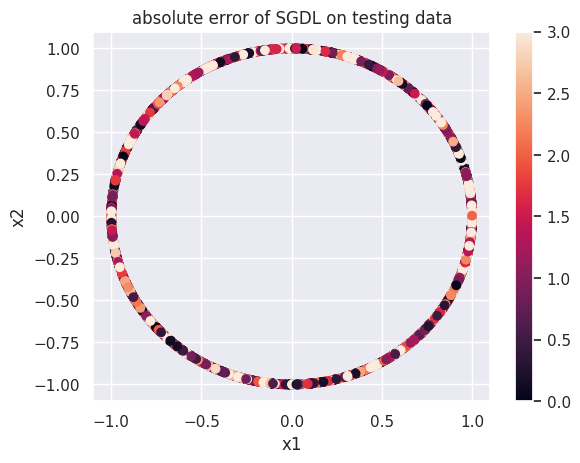

In [16]:
import glob
from analysis import test_model
path = 'results/*.pickle'.format(Amptype)
for file in glob.glob(path):
    print(file)
    test_model(file)  #if figure is True, the loss and training process will display, otherwise only display loss
    

### Using our trained model

We encourage readers to train the model themselves to better understand/test SGDL. However, it reqiures several hours to train a good model. Therefore, it is utilizing our pre-trained model is also a good option, using the following code. We also create a seperate 'analysis.py' to analysis and test our trained model.

TrainedModel/increase_q0/increase_xavier_single_epochs30000_MAXlearningrate1.00e-04_MINlearningrate1.00e-05_validation5.3665e-01_train5.4929e-01_minibatchzie1024_L0.pickle
###########################################################################
TrainedModel/increase_q0/increase_xavier_single_epochs30000_MAXlearningrate1.00e-04_MINlearningrate1.00e-05_validation5.3665e-01_train5.4929e-01_minibatchzie1024_L0.pickle
{'layers_dims': [2, 256, 256, 256, 256, 256, 256, 256, 256, 1], 'lambd_W': 0, 'sinORrelu': 0, 'activation': 'relu', 'init_method': 'xavier'}
{'optimizer': 'adam', 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08, 'error': 1e-07, 'max_learning_rate': 0.0001, 'min_learning_rate': 1e-05, 'epochs': 30000, 'REC_FRQ': 100, 'SGD': True, 'mini_batch_size': 1024}
train_rse is 0.5492908210480826, validation_rses is 0.5366520353149092
the train time is 29051.693954706192


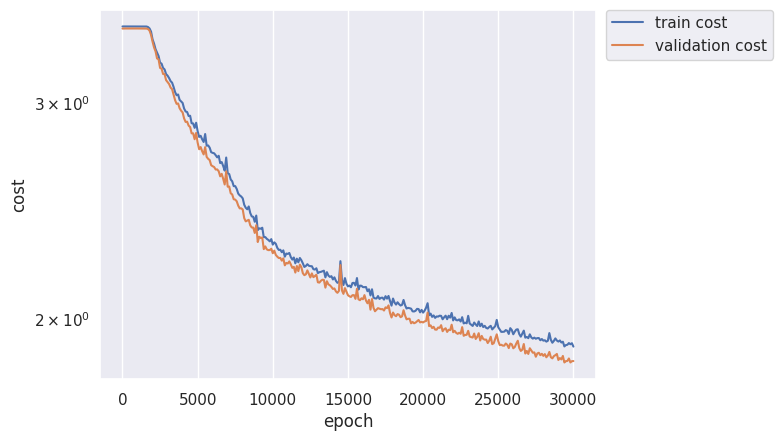

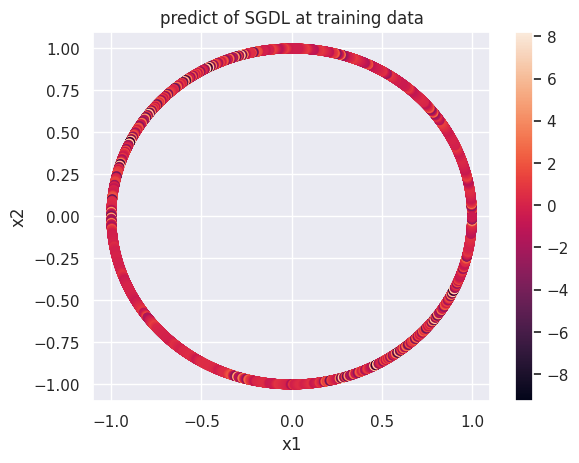

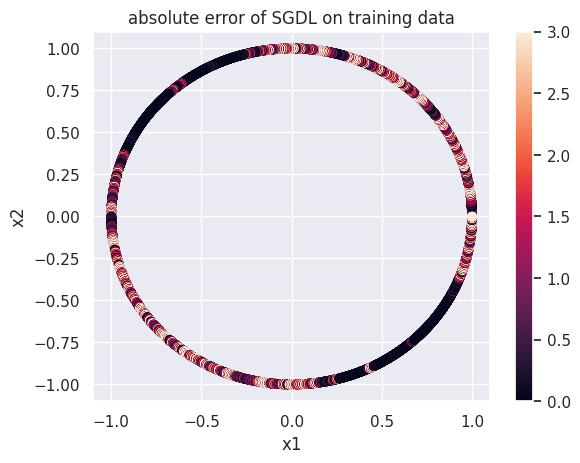

In [17]:
import glob
from analysis import results_analysis
Amptype = "increase_q0"
path = 'TrainedModel/{}/*.pickle'.format(Amptype)
for file in glob.glob(path):
    print(file)
    results_analysis(file)  #if figure is True, the loss and training process will display, otherwise only display loss

# Test model
After training the model, we employ the test data to evaluate its performance. It's important to emphasize that this test data is never involved in the training process.

TrainedModel/increase_q0/increase_xavier_single_epochs30000_MAXlearningrate1.00e-04_MINlearningrate1.00e-05_validation5.3665e-01_train5.4929e-01_minibatchzie1024_L0.pickle
the test rse for each grade is 0.5428792374590363


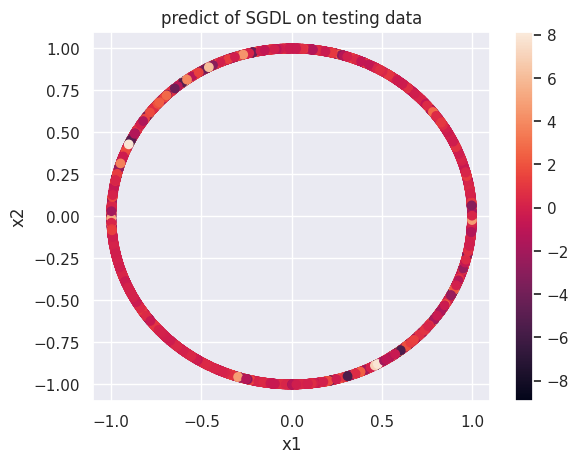

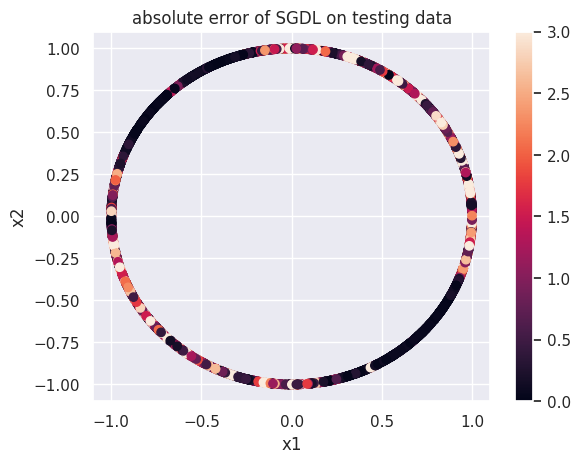

In [18]:
import glob
from analysis import test_model
Amptype = "increase_q0"
path = 'TrainedModel/{}/*.pickle'.format(Amptype)
for file in glob.glob(path):
    print(file)
    test_model(file)  #if figure is True, the loss and training process will display, otherwise only display loss